In [1]:
# ===============================================================================================================#
# Copyright 2022 Infosys Ltd.                                                                                    #
# Use of this source code is governed by Apache License Version 2.0 that can be found in the LICENSE file or at  #
# http://www.apache.org/licenses/                                                                                #
# ===============================================================================================================#

## 1. Preparation

In [2]:
from libraries._internal_utils.demo_helper import DemoHelper
import pandas as pd
from IPython.display import Image

#### <span style='color:blue'>Enter image and OCR file paths</span>

In [3]:
IMAGE_PATHS=["./data/coi_1.jpg", "./data/coi_2.jpg"]
IMAGE_OCR_PATHS=['./data/coi_1.jpg.hocr', './data/coi_2.jpg.hocr']

#### Visualize

In [4]:
tab_widget = DemoHelper.create_tab_toolbar(IMAGE_PATHS)
display(tab_widget)
for idx, image_path in enumerate(IMAGE_PATHS):
    with tab_widget.children[idx]:
        display(Image(filename=image_path, width=1000, height=50))

<!-- #### Util Method to Plot response region on Image -->

## 2. Initialization

#### <span style='color:blue'>Create new instance with desired OCR service provider</span>

<!-- ### 1.1. Example -  Create Instance - Without logging -->

In [ ]:
import json
import logging
import os

from infy_ocr_parser import ocr_parser
from infy_ocr_parser.providers.tesseract_ocr_data_service_provider import TesseractOcrDataServiceProvider

ocr_file_list = IMAGE_OCR_PATHS

if not os.path.exists("./logs"):
    os.makedirs("./logs")
logging.basicConfig(
    filename=("./logs" + "/app_log.log"),
    format="%(asctime)s- %(levelname)s- %(message)s",
    level=logging.INFO,
    datefmt="%d-%b-%y %H:%M:%S",
)
logger = logging.getLogger()
data_service_provider_obj = TesseractOcrDataServiceProvider()

ocr_parse_obj = ocr_parser.OcrParser(ocr_file_list=ocr_file_list,
                                     data_service_provider=data_service_provider_obj,
                                     logger=logger)

## 3. API - get_bbox_for()

### 3.9. Using Special Keyword as anchor text

In [6]:
reg_def_dict_list = [
    {
        "anchorText": [
            "{{BOD}}", #OR "{{EOD}}"
        ]    
    },
    {
        "anchorText": [
            "End Date"
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": "0", 
            "top": "0",
            "right": None, 
            "bottom": None
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [7]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[0, 0, 2550, 2250], [2244, 1024, 125, 18]]
region_bboxes = [[0, 0, 2244, 1024]]


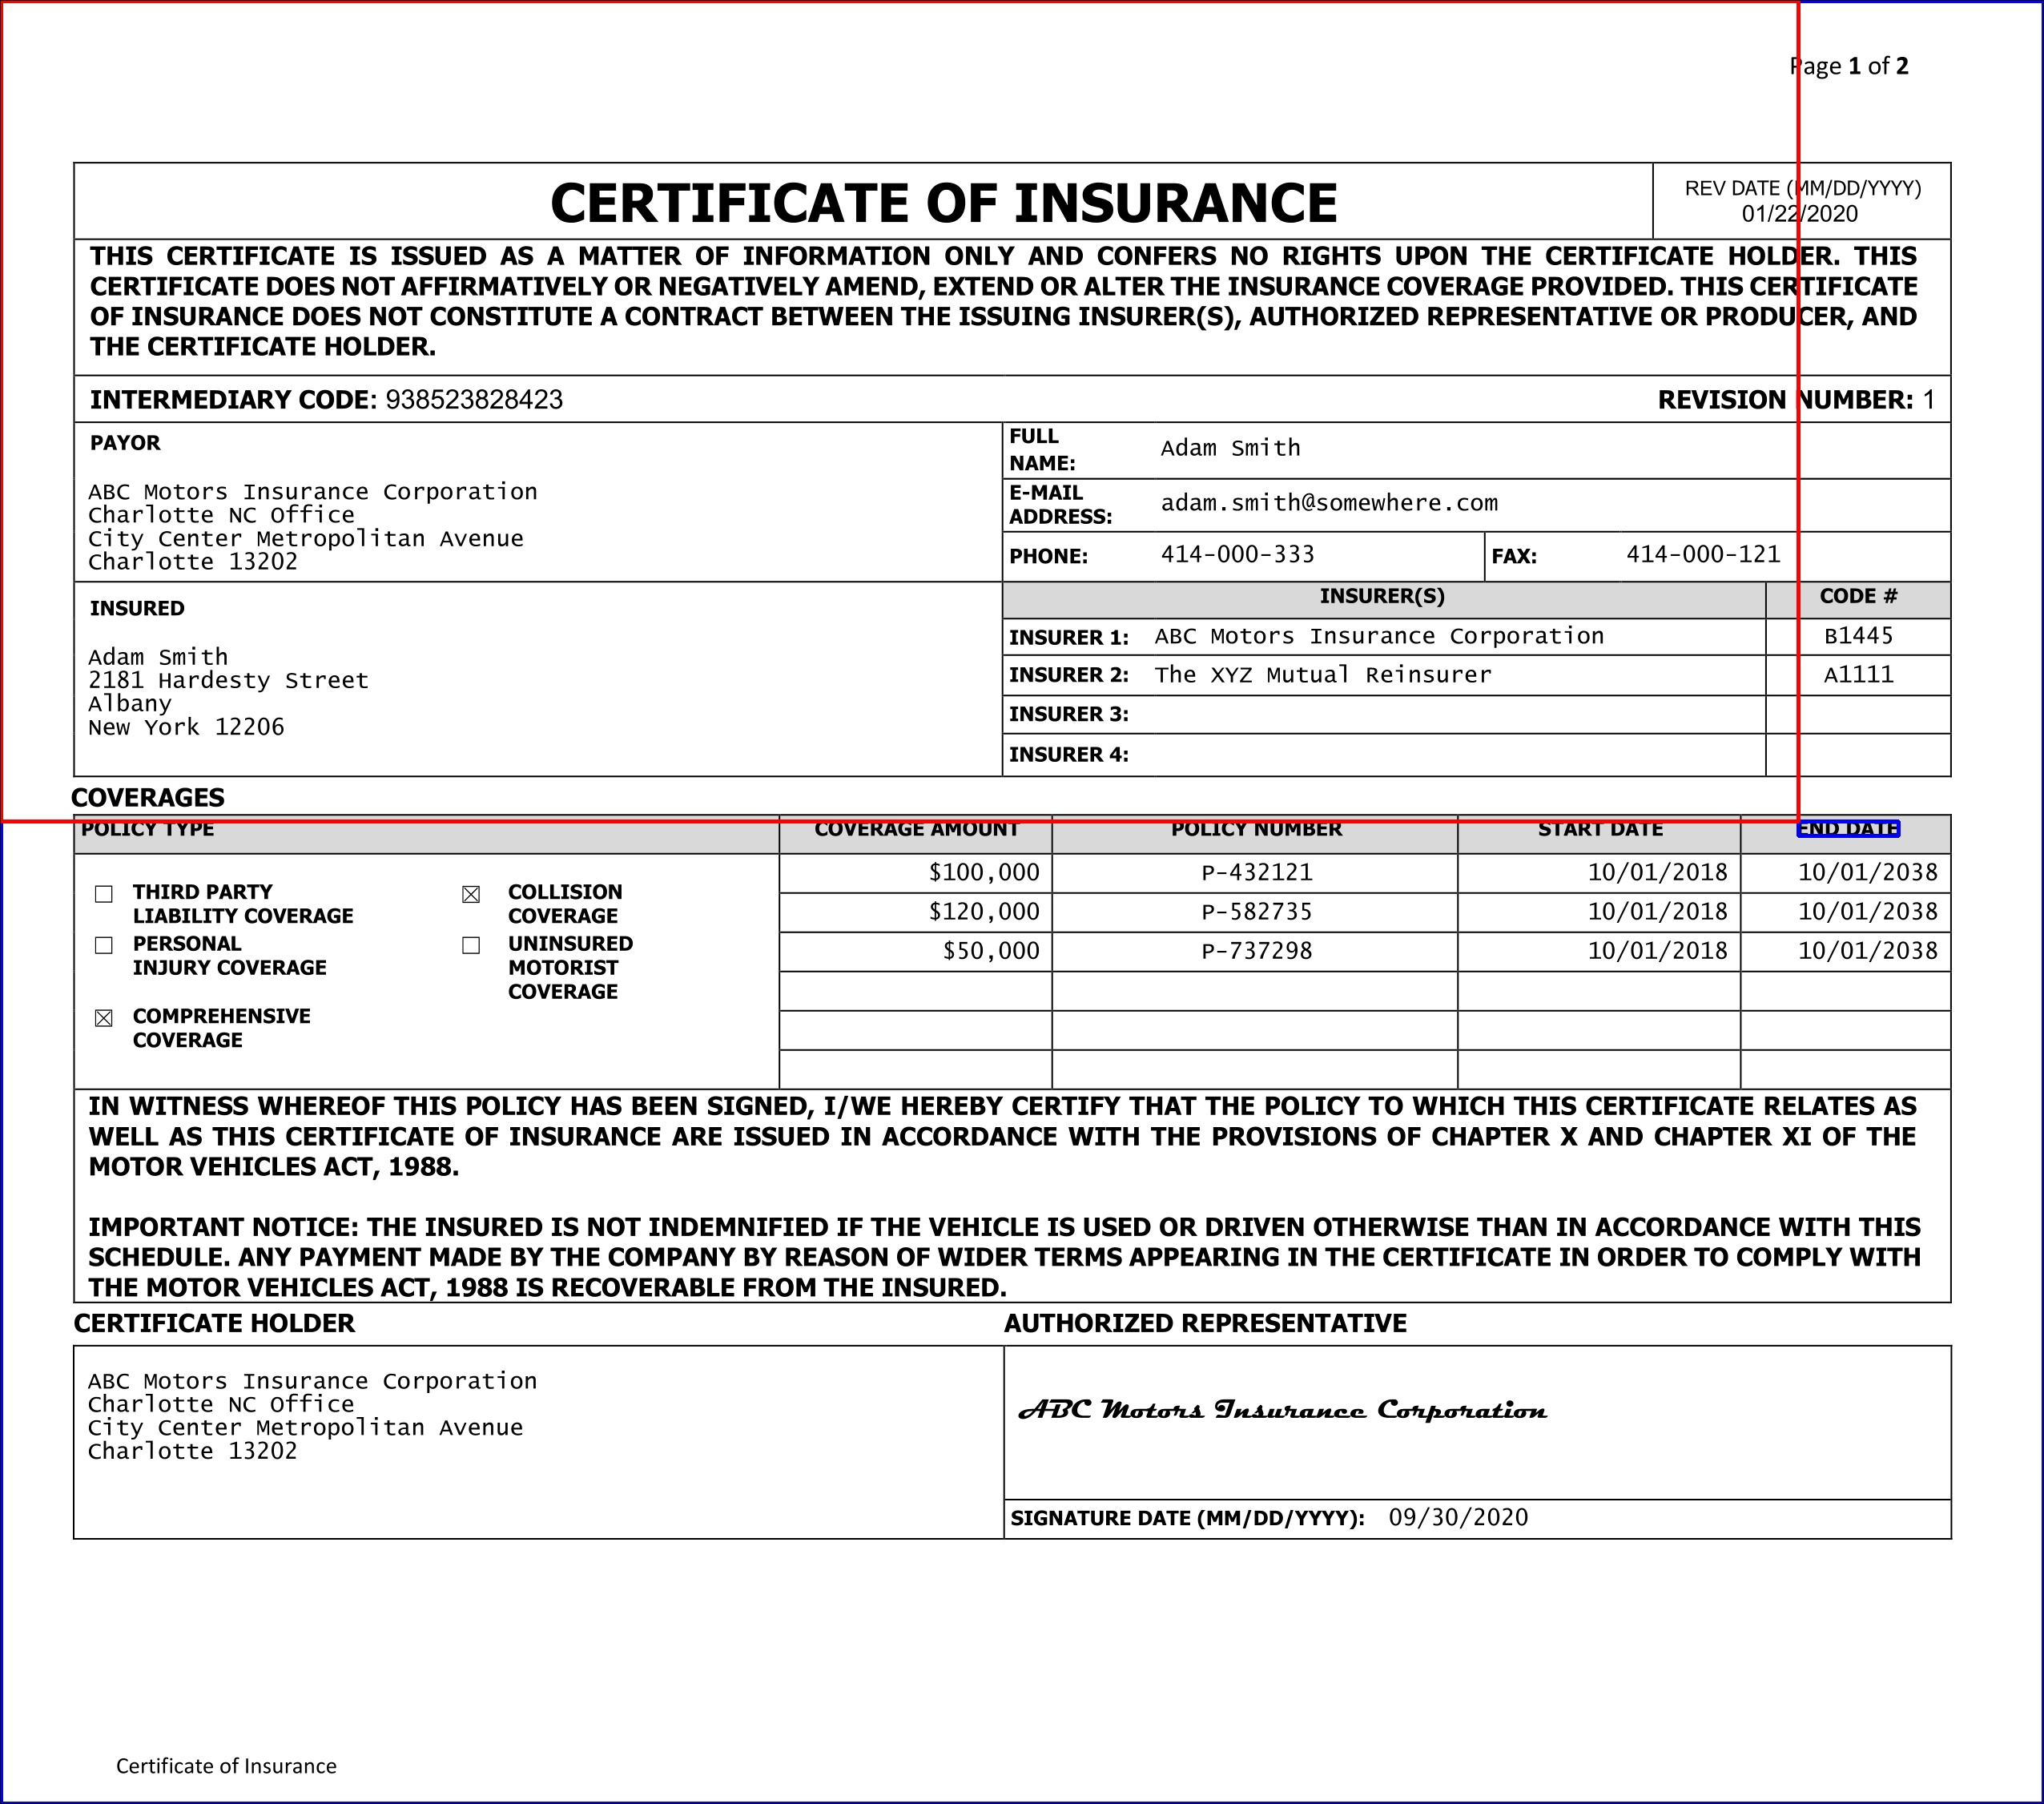

In [8]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  

### 3.10. Using absolute unit and Empty anchor text

In [9]:
reg_def_dict_list=[
    {
        "anchorText": [],
        "anchorPoint1": {
            "left": "5px",
            "top": "50%a",
            "right": None,
            "bottom": None
        },
        "anchorPoint2": {
            "left": "50%a",
            "top": None,
            "right": None,
            "bottom": "-17%a"
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [10]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[0, 0, 2550, 2250]]
region_bboxes = [[13, 1125, 1262, 743]]


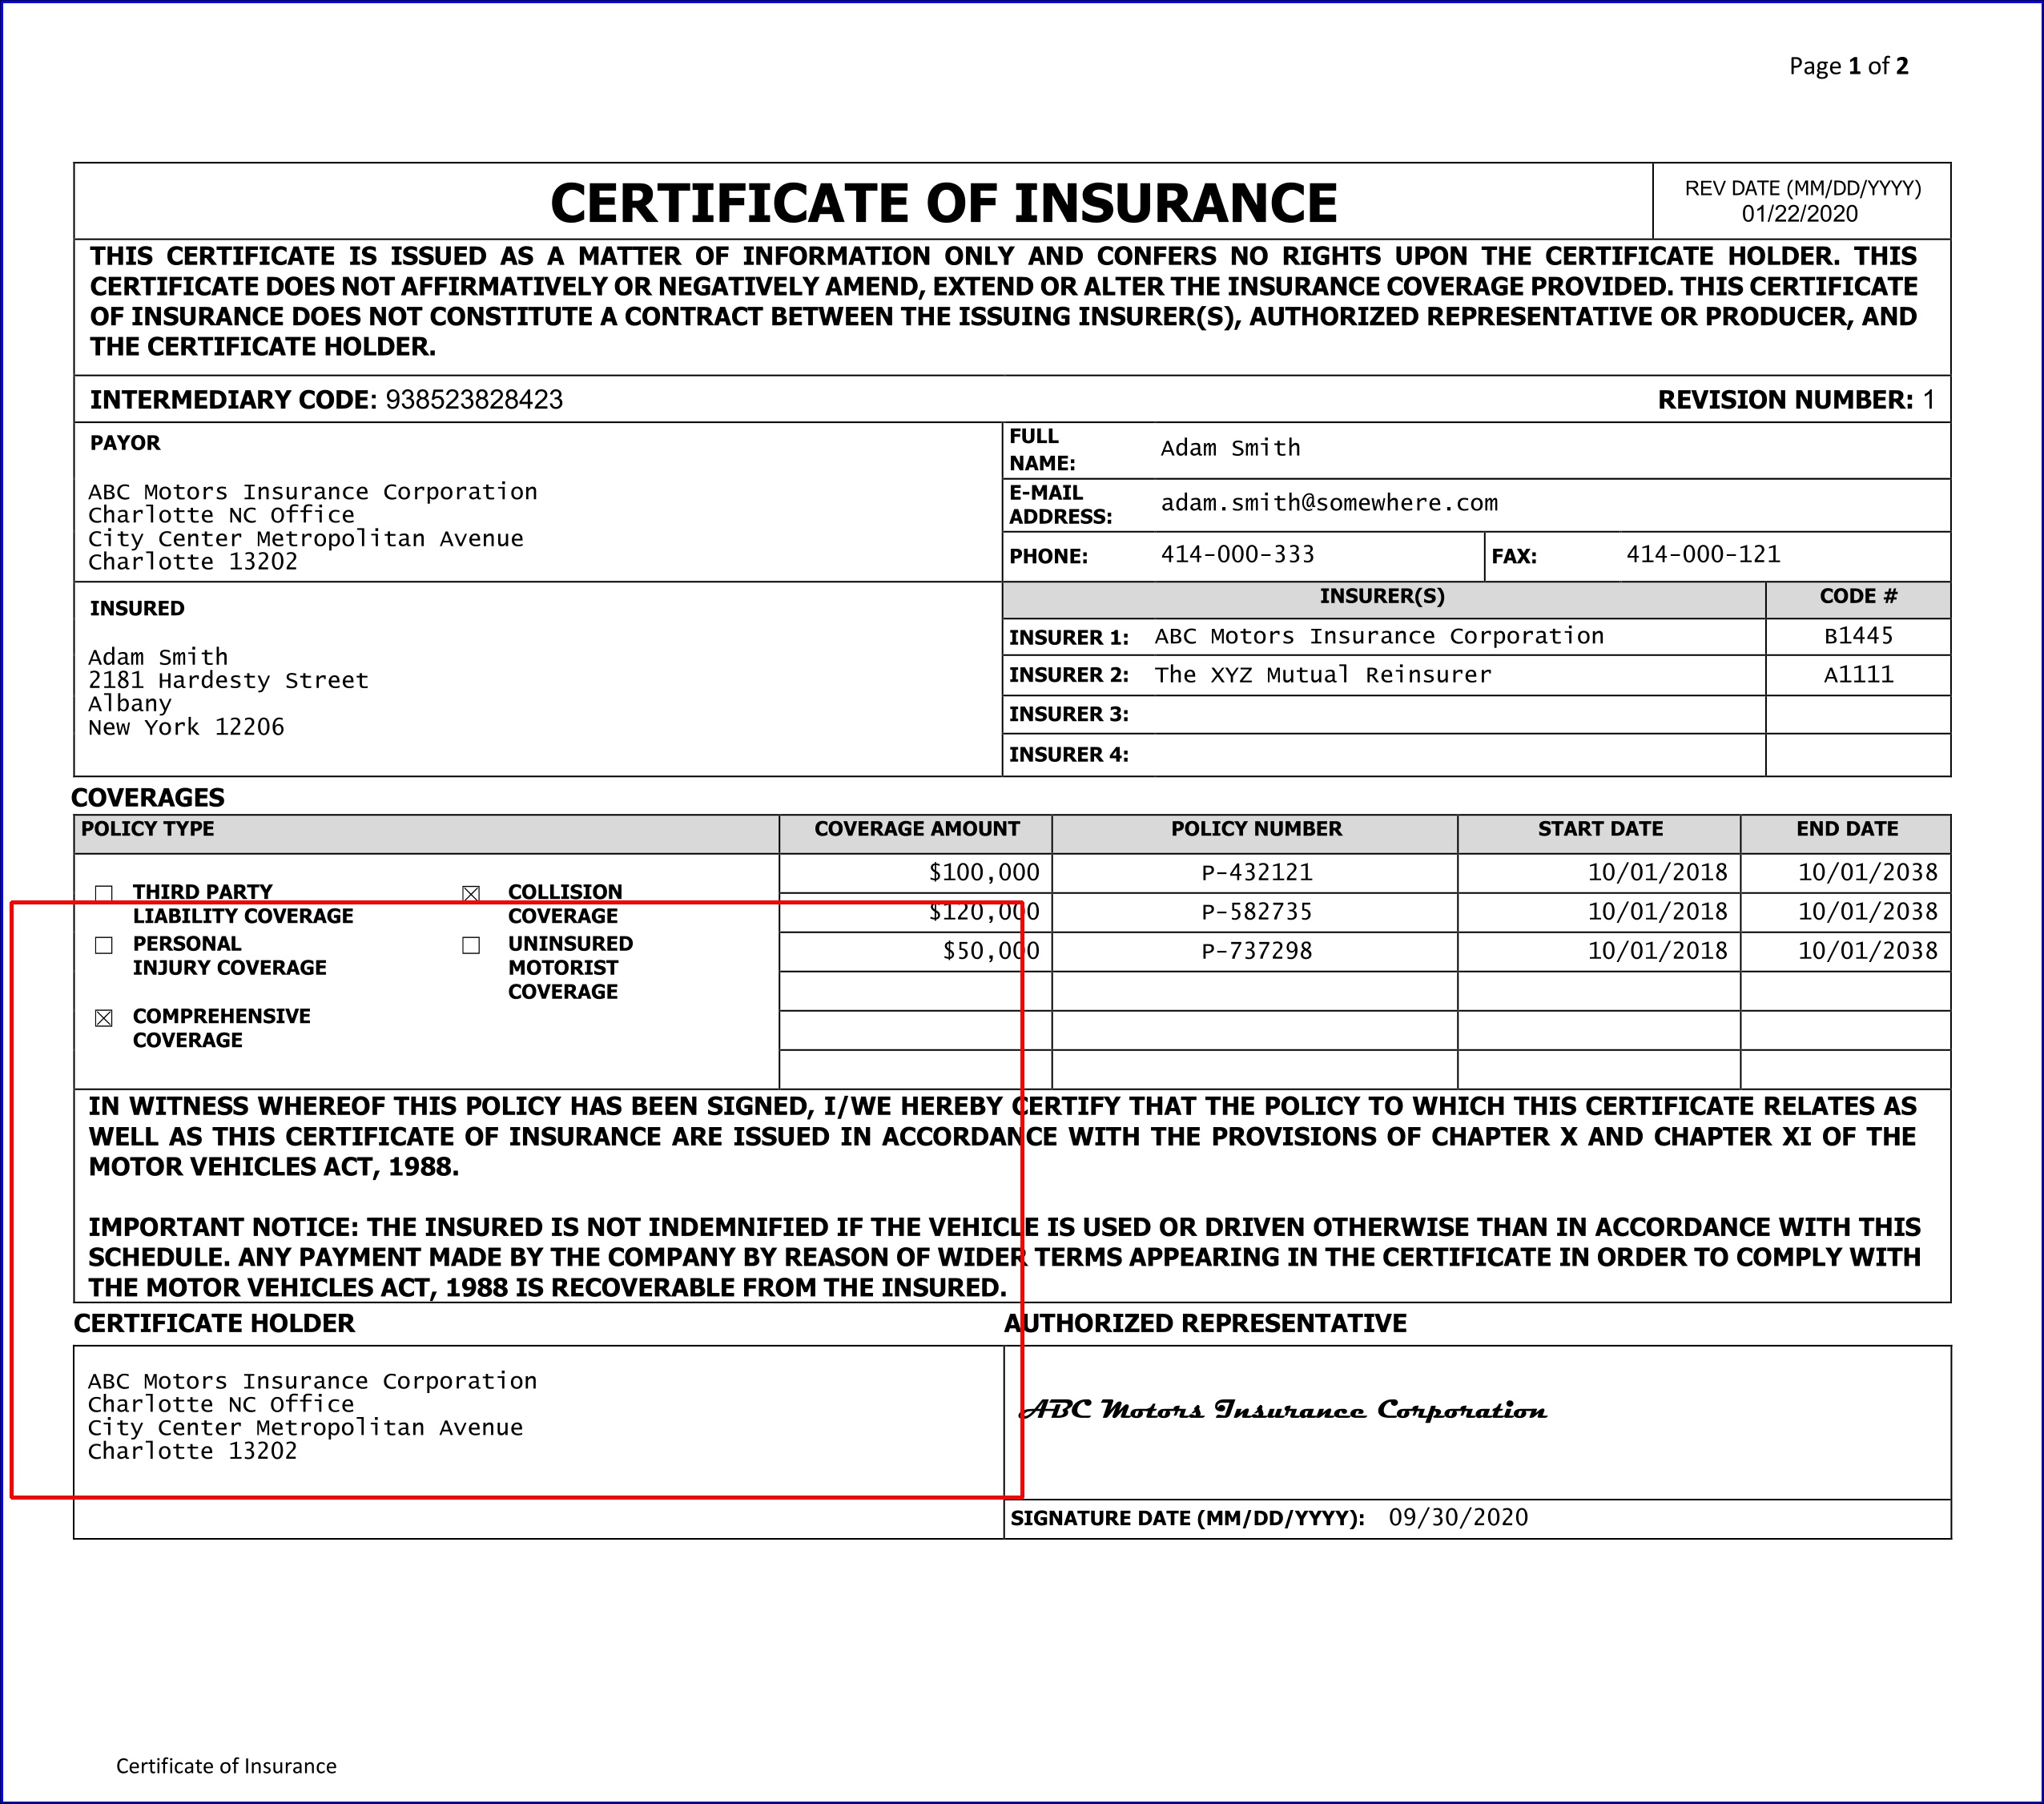

page = 2
anchor_text_bboxes = [[0, 0, 2550, 2250]]
region_bboxes = [[13, 1125, 1262, 743]]


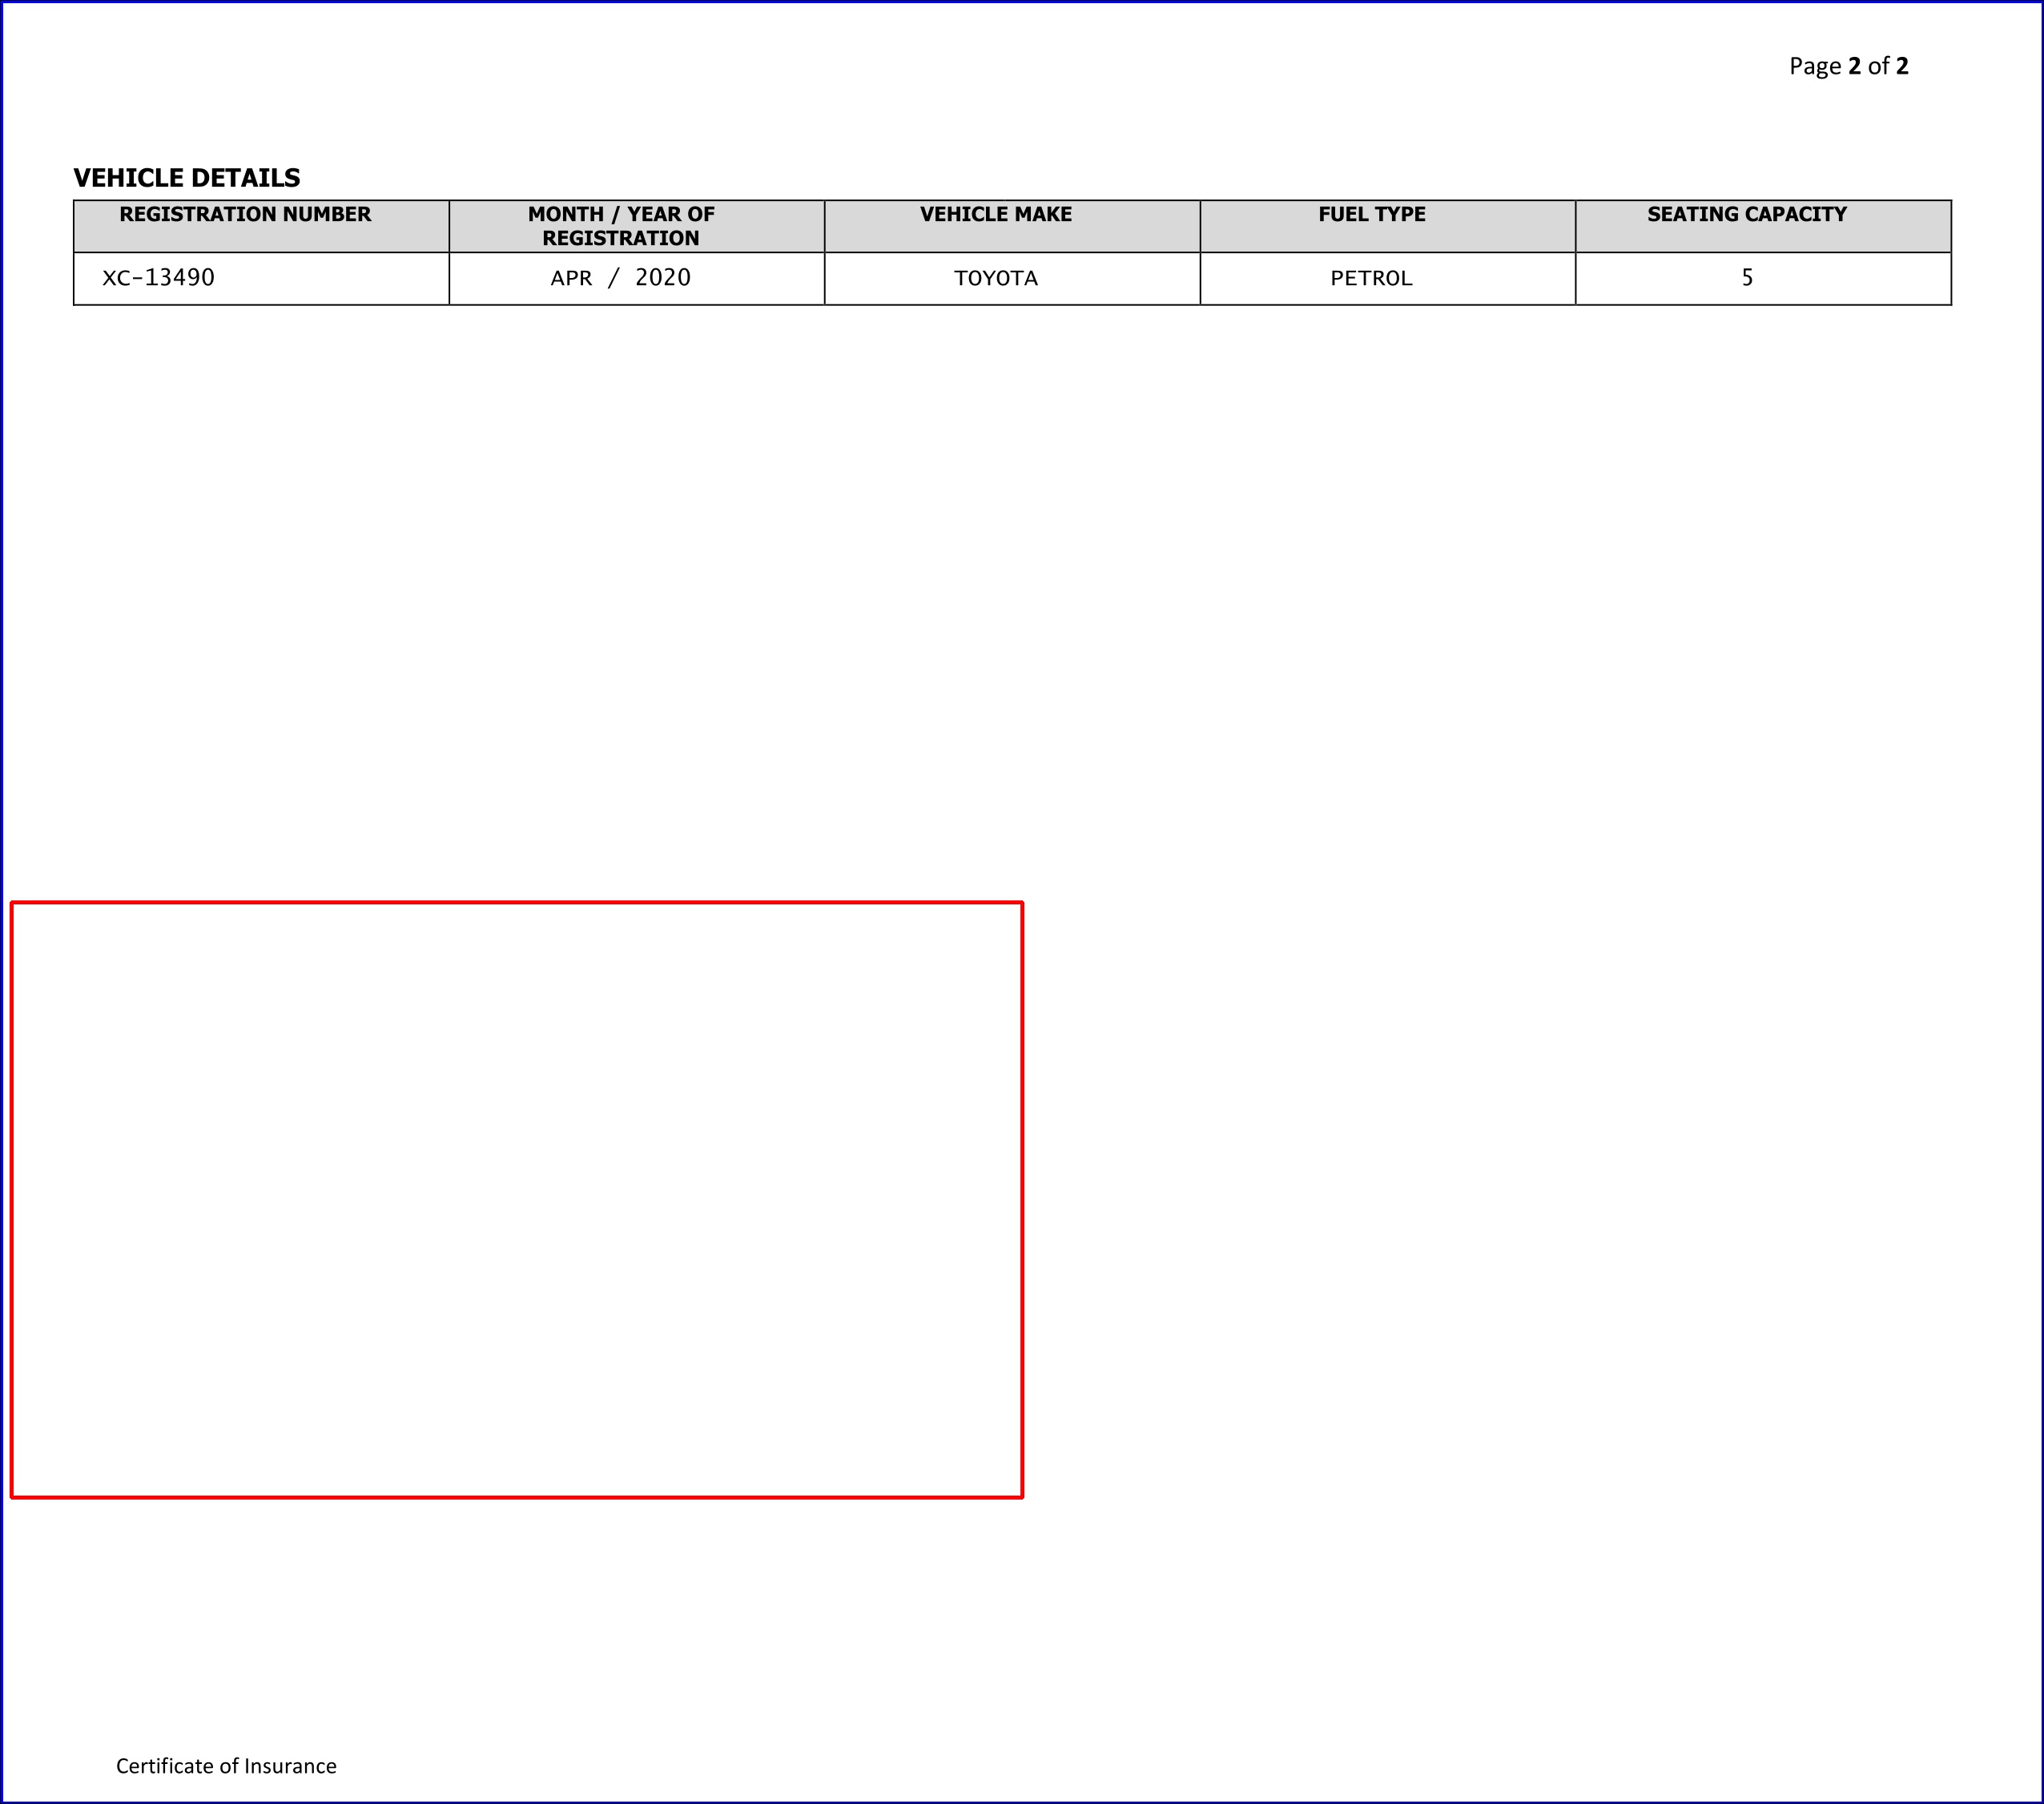

In [11]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  

### 3.11. Type of Measurement units

In [12]:
reg_def_dict_list = [
    {
        "anchorText": [
            "^phone"
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": "-5px", 
            "top": "-1t",
            "right": None, 
            "bottom": None
        },
        "anchorPoint2": {
            "left": None,
            "top": None,
            "right": "-70%a", 
            "bottom": "1%r"
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [13]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[1261, 661, 95, 52]]
region_bboxes = [[1248, 609, 537, 119]]


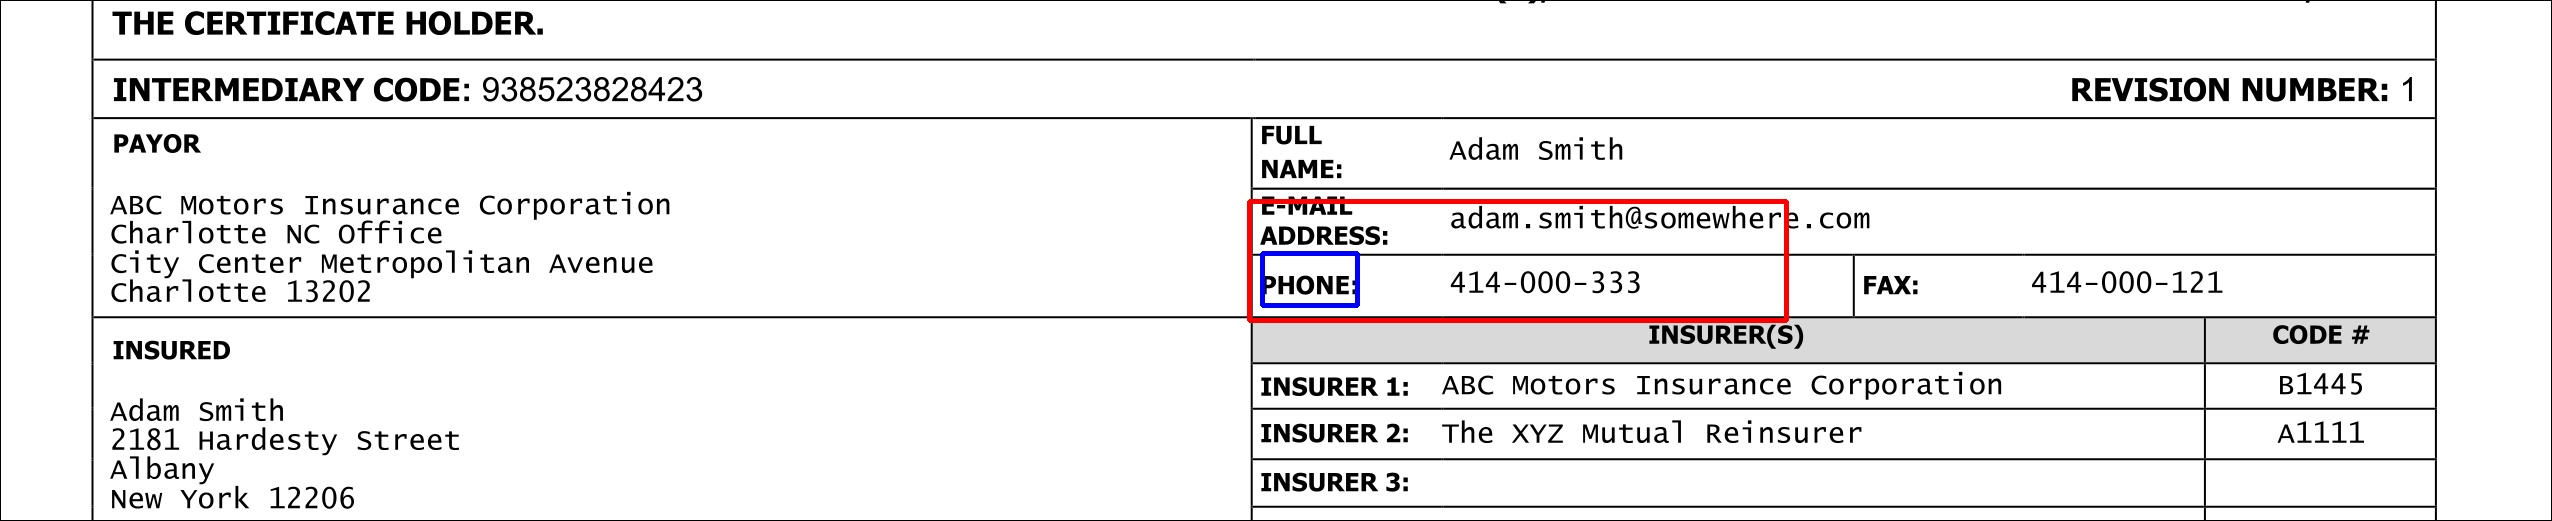

In [14]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  

1. `anchorPoint1` given at `left-top` position by including some padding of -5px left and -1t(time of anchor text height) top distance from anchorText.
1. `anchorPoint2` given at `right-bottom` position like -70% of abosulte page width and 1% of relative distance from anchor text.

### 3.12. Find region by subtracting Header, Footer and overlap region

In [15]:
reg_def_dict_list = [
    {
        "pageNum": ["1"],
        "anchorText": [
            "Coverages"
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": None, 
            "top": 0,
            "right": 0,
            "bottom": None
        }
    },
    {
        "pageNum": ["2"],
        "anchorText": [
            "Vehicle Details$"
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": None,
            "top": None, 
            "right": "0",
            "bottom": "0"
        }
    }
]
sub_reg_def_dict_list = [
    [
        {
            "anchorText": [
                "Certificate Holder"
            ],
            "anchorPoint1": {
                "left": "-100%",
                "top": None, 
                "right": None,
                "bottom": 150,
            },
            "anchorPoint2": {
                "left": None, 
                "top": None, 
                "right": "100%", 
                "bottom": "100%"
            }
        }
    ],
    [
        {
            "anchorText": [
                "Vehicle Details"
            ],
            "anchorPoint1": {
                "left": "-100%",
                "top": "-100%", 
                "right": None,
                "bottom": None
            },
            "anchorPoint2": {
                "left": None,
                "top": 0, 
                "right": "100%", 
                "bottom": None
            }
        }
    ]
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list, 
                                    subtract_region_definition = sub_reg_def_dict_list)

#### Output

In [16]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[89, 982, 190, 24], [91, 209, 282, 24]]
region_bboxes = [[0, 982, 2550, 1018]]


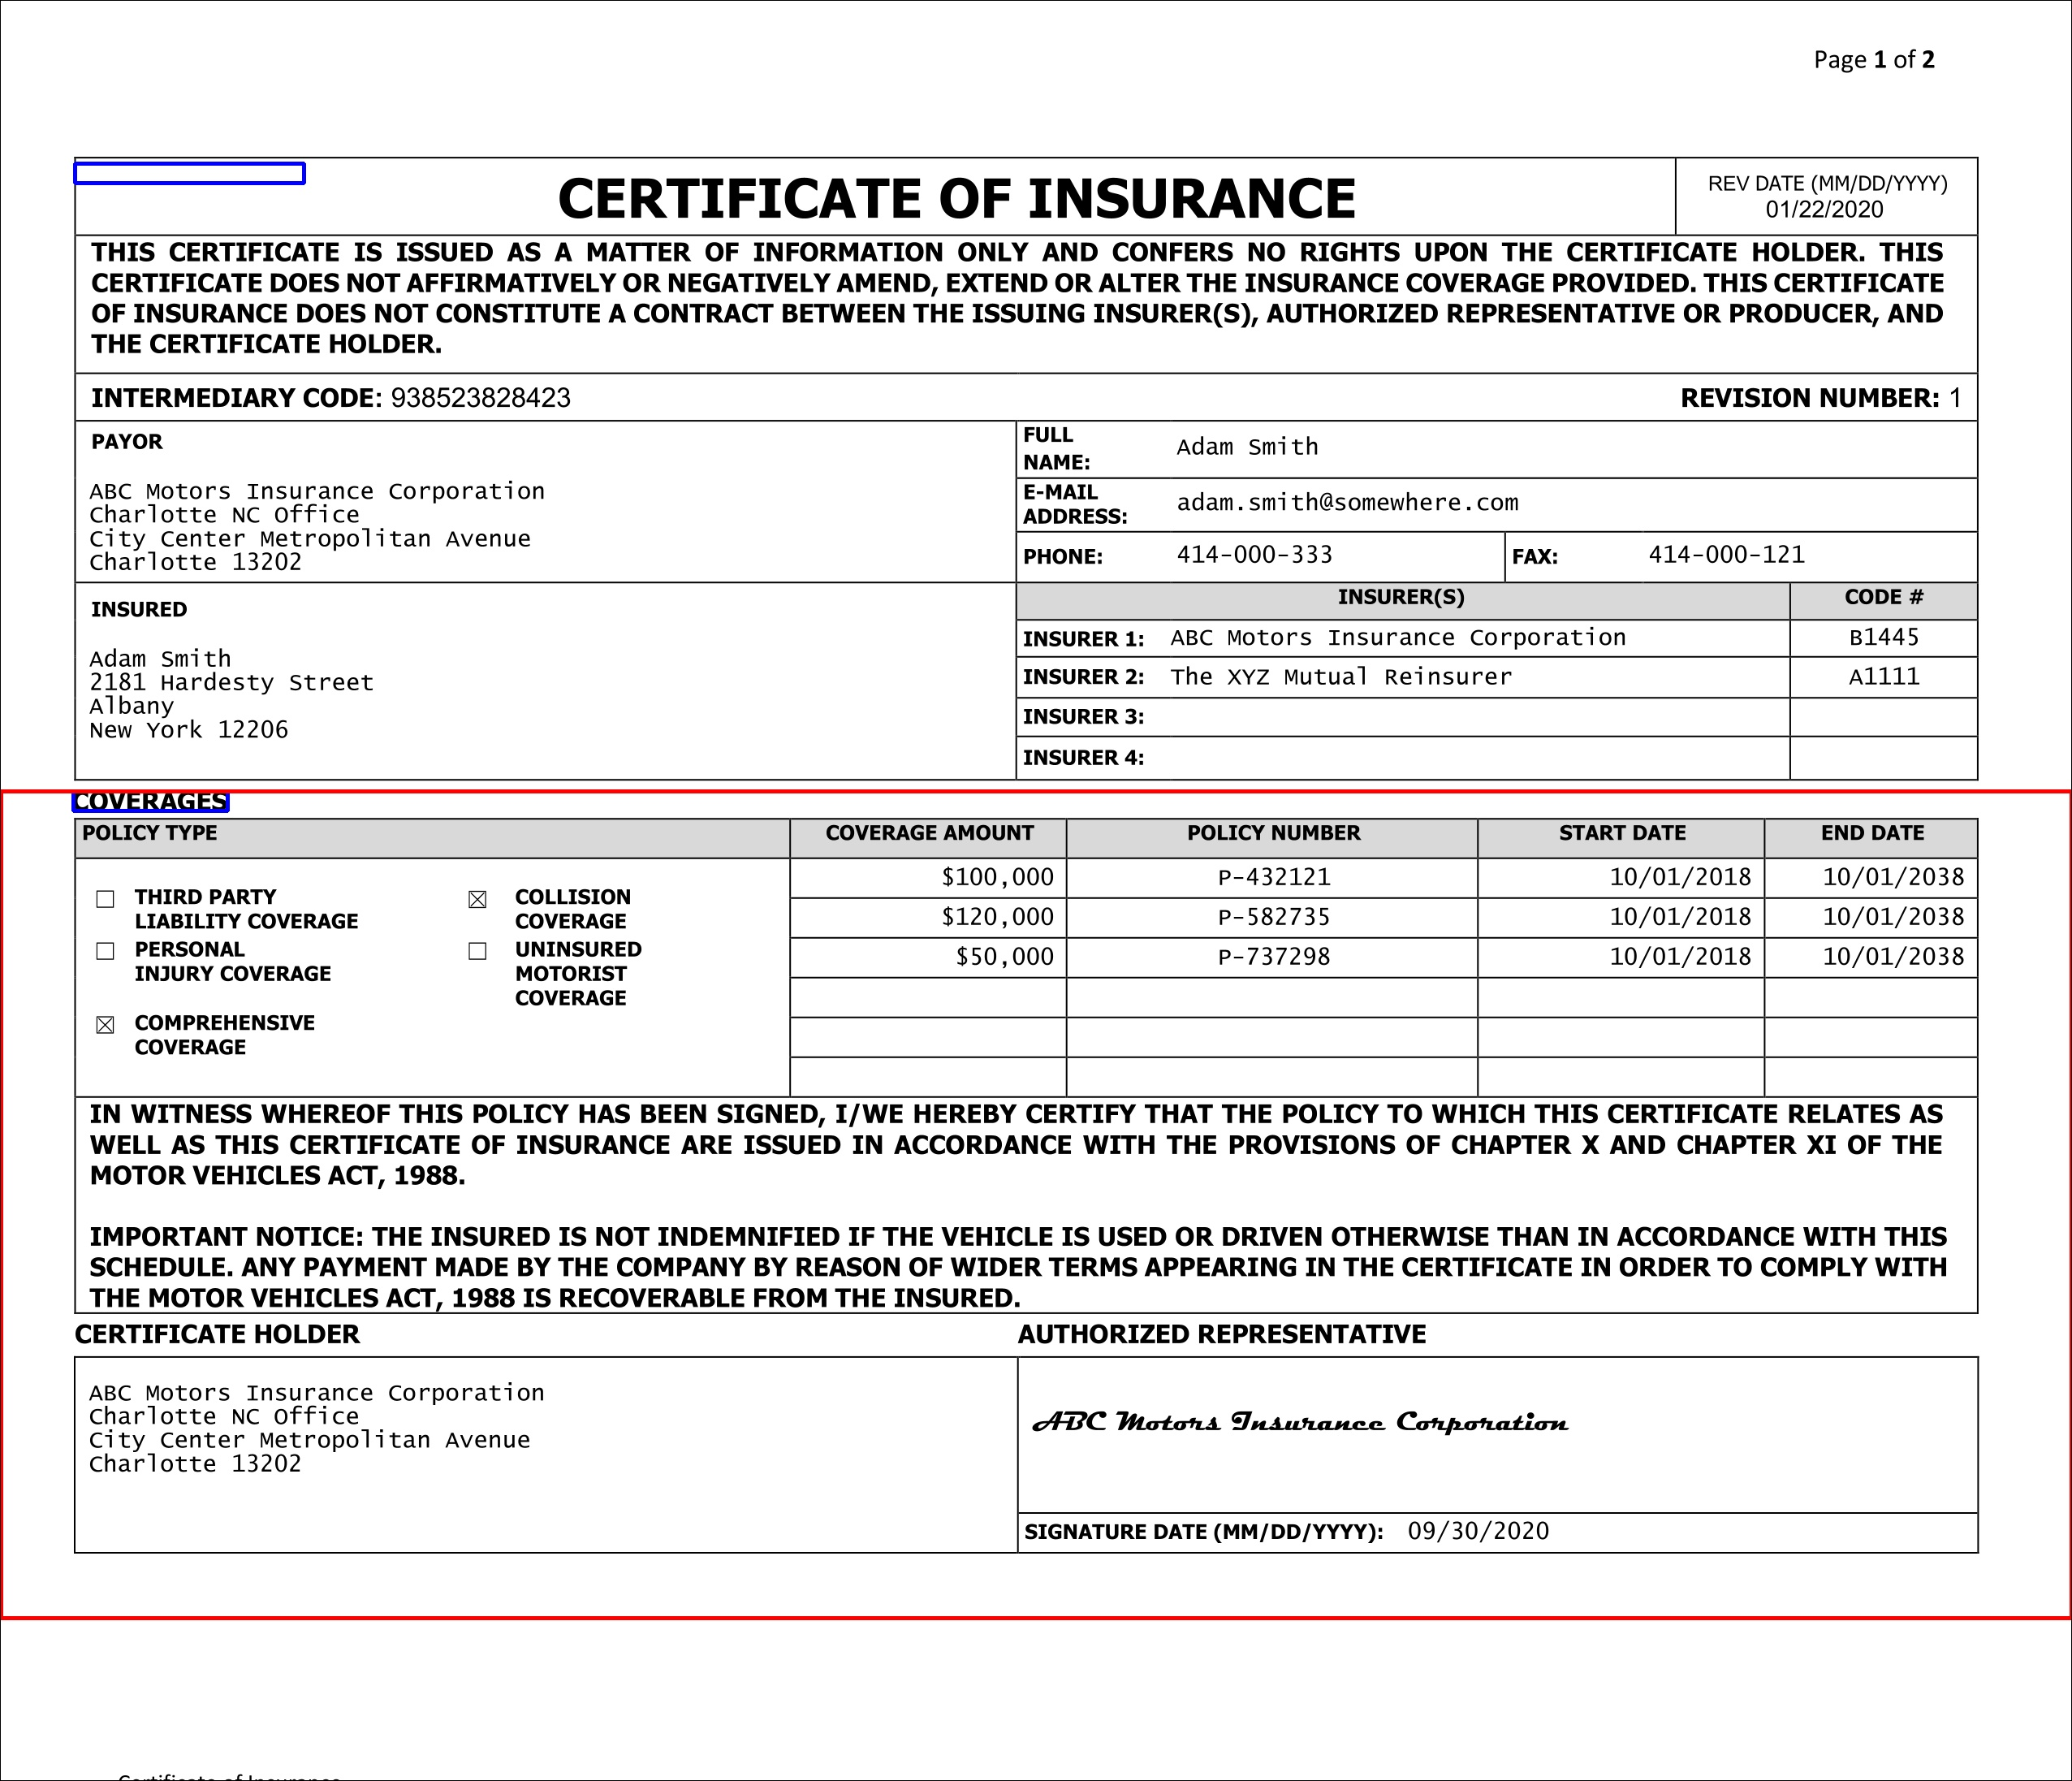

page = 2
anchor_text_bboxes = [[89, 982, 190, 24], [91, 209, 282, 24]]
region_bboxes = [[0, 209, 2550, 233]]


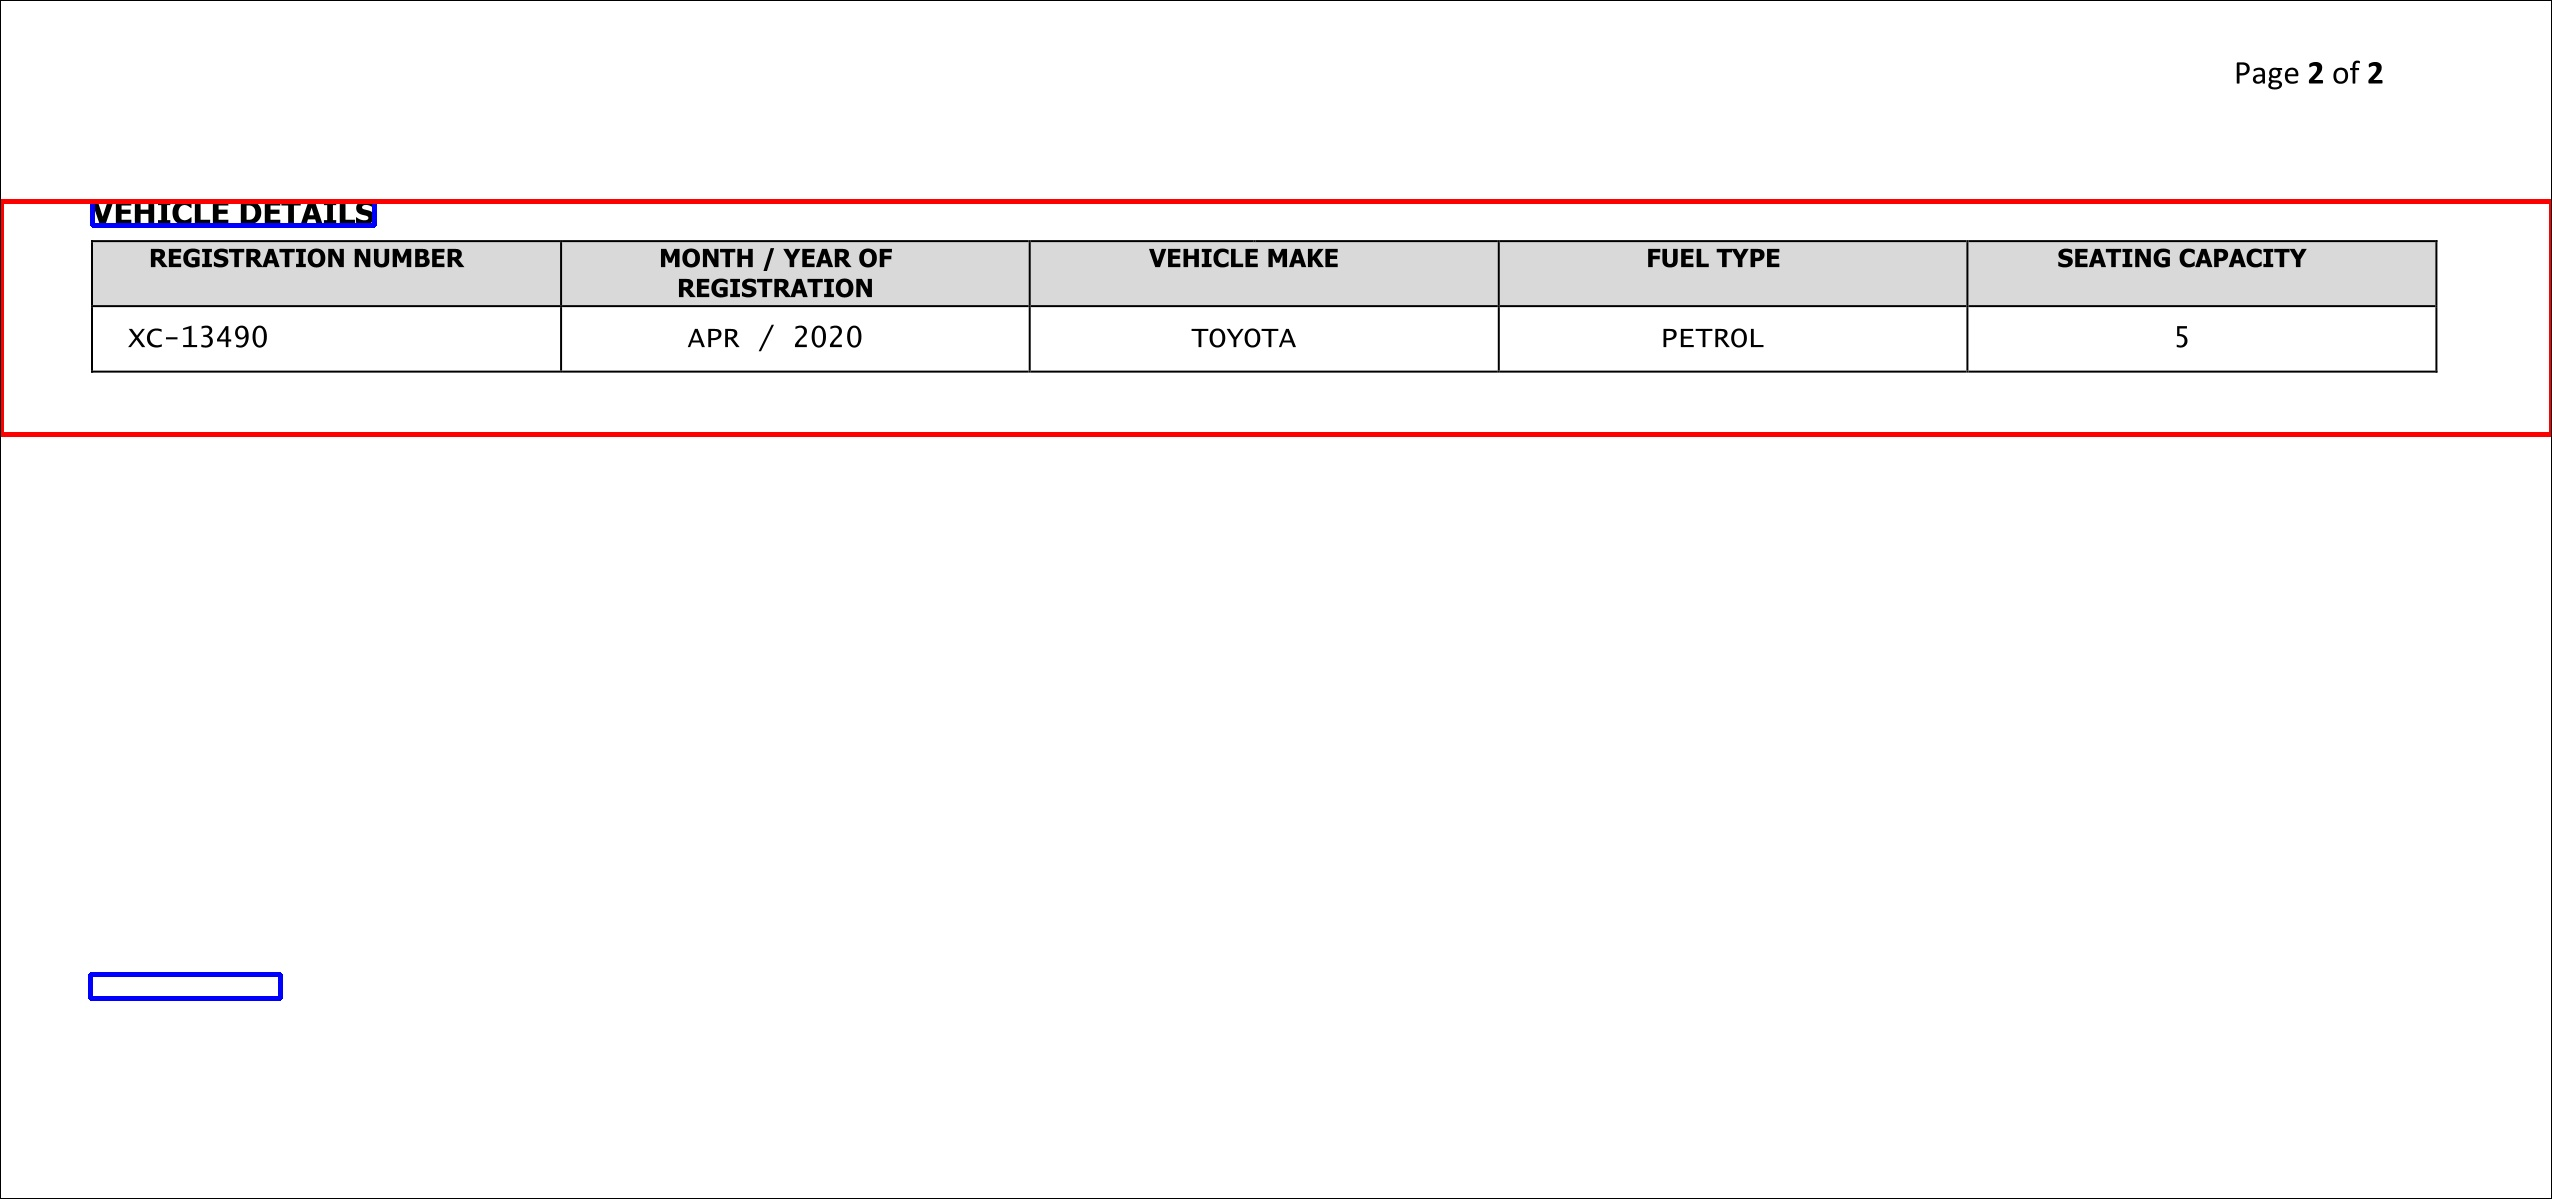

In [17]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  